# 作業

- 作業目標 : iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

In [10]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

for key, value in iris.items():
    try:
        print(key, value.shape)
    except:
        print(key)
print(iris['feature_names'])
print(iris['target_names'])

data (150, 4)
target (150,)
target_names (3,)
DESCR
feature_names
filename
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


### 載入 相關套件 並 執行 kmean 實驗 ...

- 實驗測試不同的群數
- 實驗測試不同的初始值
- 呈現結果

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

?KMeans

### 設定模型估計參數

In [3]:
estimators = [('kmeans_2',KMeans(n_clusters=2)),('kmeans_3', KMeans(n_clusters=3)),('kmeans_4', KMeans(n_clusters=4)),
             ('kmeans_init_adj', KMeans(n_clusters=5, init='random',n_init=7, max_iter=100))]

### 資料建模並視覺化效果

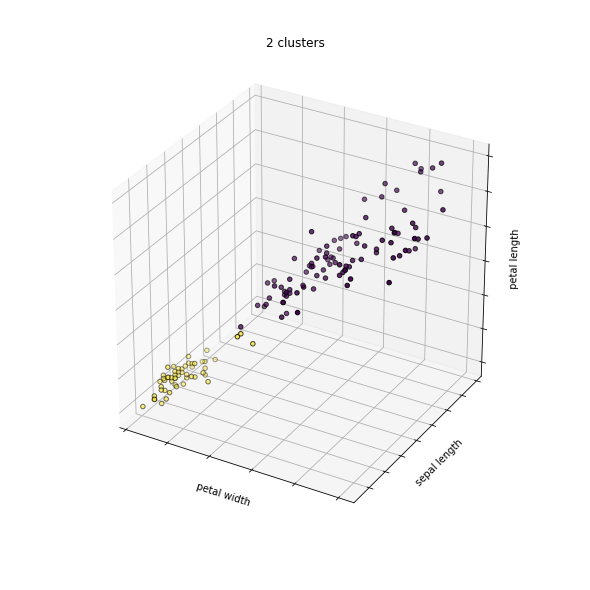

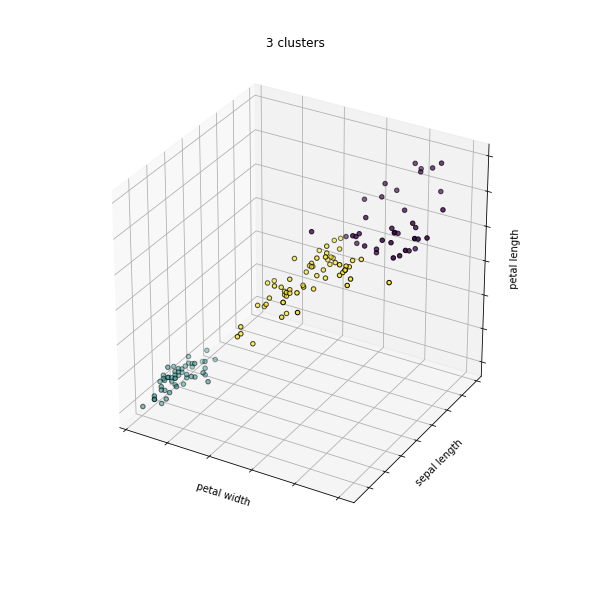

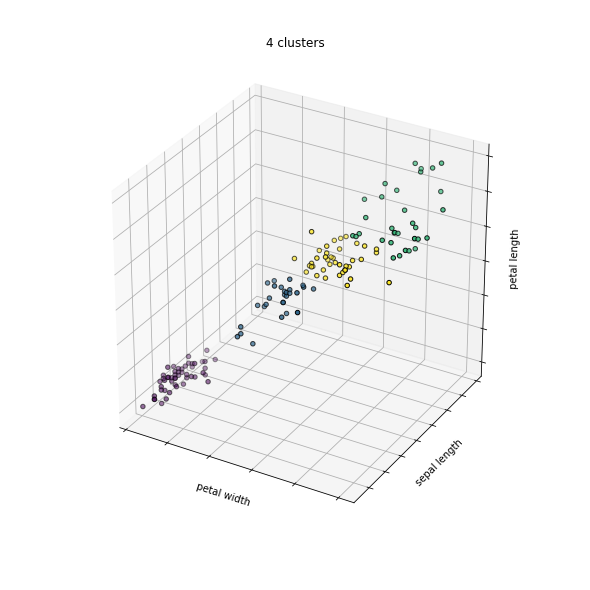

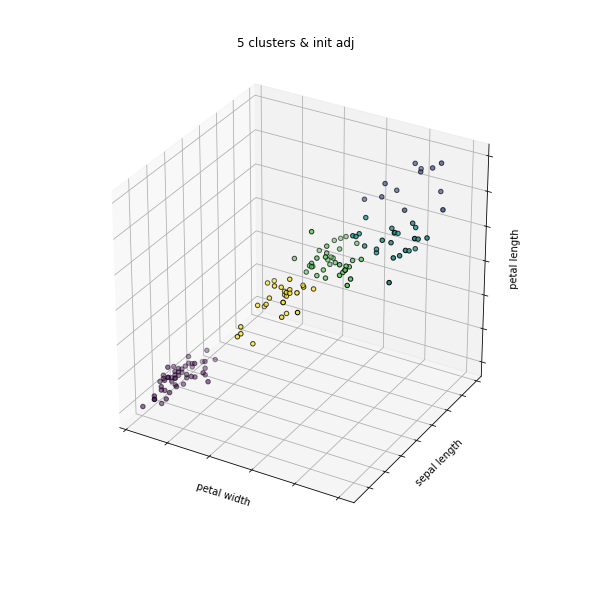

In [9]:
fignum = 1 
titles = ['2 clusters', '3 clusters','4 clusters','5 clusters & init adj']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(8,8))
    ax = Axes3D(fig)
    
    # 訓練資料
    est.fit(X)
    labels = est.labels_
    
    ax.scatter(X[:,3], X[:,0], X[:,2],
              c =labels.astype(np.float), edgecolor ='k')
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('petal width')
    ax.set_ylabel('sepal length')
    ax.set_zlabel('petal length')
    ax.set_title(titles[fignum -1])
    ax.dist = 12
    fignum = fignum + 1

### 繪出資料集原始Label群

C:\Users\freet\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


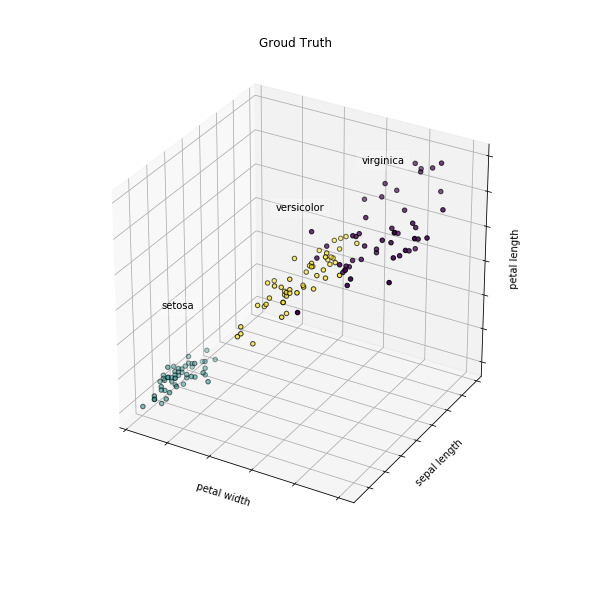

In [11]:
# Plot the ground truth
fig = plt.figure(fignum, figsize=(8,8))
ax = Axes3D(fig)

for name, label in[('setosa',0),('versicolor',1),('virginica',2)]:
    ax.text3D(X[y== label, 3].mean(), X[y== label, 0].mean(), X[y== label, 2].mean() +2,
             name, horizontalalignment='center', bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))

# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('petal width')
ax.set_ylabel('sepal length')
ax.set_zlabel('petal length')
ax.set_title('Groud Truth')
ax.dist = 12

fig.show()